# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient


%matplotlib inline

In [2]:
# Read your api key environment variable
analyzer = SentimentIntensityAnalyzer()

load_dotenv()

# Set News API Key

newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [3]:
# Create a function to retrieve articles with a newsapi client

def get_articles(keyword):    
    articles = newsapi.get_everything(
        q=keyword,
        language="en",
        sort_by="relevancy",
    )
    return articles

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = get_articles("bitcoin")


In [5]:
bitcoin_articles['articles'][1].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [6]:
bitcoin_df = pd.DataFrame.from_dict(bitcoin_articles['articles']) 
bitcoin_df.dropna(inplace=True)
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Jonathan Shieber,Casa pivots to provide self-custody services t...,"Casa, a Colorado-based provider of bitcoin sec...",http://techcrunch.com/2020/08/06/casa-pivots-t...,https://techcrunch.com/wp-content/uploads/2019...,2020-08-06T18:25:29Z,"Casa, a Colorado-based provider of bitcoin sec..."
1,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,Twitter hacker was previously caught stealing ...,"Graham Ivan Clark, the 17-year-old “mastermind...",https://www.engadget.com/twitter-hacker-graham...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-03T14:02:34Z,"In April, the Secret Service seized 100 Bitcoi..."
2,"{'id': 'wired', 'name': 'Wired'}",Lily Hay Newman,The Quest to Liberate $300K of Bitcoin From an...,The story of a guy who wouldn't let a few quin...,https://www.wired.com/story/quest-to-liberate-...,https://media.wired.com/photos/5f2b61c651a37c3...,2020-08-06T16:16:32Z,"The question still remained, though, whether a..."
3,"{'id': None, 'name': 'Gizmodo.com'}",John Biggs,This Ransomware Stole $25 Million in 5 Months,A ransomware variant called NetWalker is doing...,https://gizmodo.com/this-ransomware-stole-25-m...,https://i.kinja-img.com/gawker-media/image/upl...,2020-08-04T20:30:00Z,A ransomware variant called NetWalker is doing...
4,"{'id': 'engadget', 'name': 'Engadget'}",Mariella Moon,FBI and CISA warn against surge in voice phish...,Authorities saw an uptick in voice phishing (o...,https://www.engadget.com/fbi-cisa-issue-voice-...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-23T12:19:36Z,“The COVID-19 pandemic has resulted in a mass ...


In [7]:
# Fetch the Ethereum news articles
ethereum_articles = get_articles("ethereum")


In [8]:
ethereum_df = pd.DataFrame.from_dict(ethereum_articles['articles']) 

ethereum_df.dropna(inplace=True)
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'mashable', 'name': 'Mashable'}",Joseph Green,Master blockchain with this cheap online course,TL;DR: The Mega Blockchain Mastery Bundle is o...,https://mashable.com/uk/shopping/aug-17-mega-b...,https://mondrian.mashable.com/2020%252F08%252F...,2020-08-17T04:00:00Z,TL;DR: The Mega Blockchain Mastery Bundle is o...
2,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Boom or bust? Welcome to the freewheeling worl...,It sounds like a surefire bet. You lend money ...,https://www.reuters.com/article/us-crypto-curr...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-08-26T06:07:00Z,LONDON (Reuters) - It sounds like a surefire b...
3,"{'id': 'reuters', 'name': 'Reuters'}",Anna Irrera,ConsenSys acquires JPMorgan's blockchain platf...,Brooklyn-based technology startup ConsenSys ha...,https://www.reuters.com/article/us-jpmorgan-co...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-25T13:01:00Z,NEW YORK (Reuters) - Brooklyn-based technology...
4,"{'id': None, 'name': 'The Daily Hodl'}",Daily Hodl Staff,Million-Dollar Bitcoin Whale Says Traders Shou...,<ol><li>Million-Dollar Bitcoin Whale Says Trad...,https://dailyhodl.com/2020/08/19/million-dolla...,https://i2.wp.com/dailyhodl.com/wp-content/upl...,2020-08-19T07:04:25Z,An outspoken Bitcoin whale who rarely shows af...
5,"{'id': 'business-insider', 'name': 'Business I...",Emily Graffeo,"Gold 'certainly' could soar as high as $3000, ...",<ul>\n<li>Michael Novogratz told Bloomberg the...,https://www.businessinsider.com/gold-price-out...,https://images.markets.businessinsider.com/ima...,2020-08-14T20:13:44Z,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...


In [9]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments=[]

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = [ "compound", "positive", "negative", "neutral"]
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]

bitcoin_df = pd.merge(bitcoin_df , bitcoin_sentiment_df, left_index = True, right_index =True)
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Jonathan Shieber,Casa pivots to provide self-custody services t...,"Casa, a Colorado-based provider of bitcoin sec...",http://techcrunch.com/2020/08/06/casa-pivots-t...,https://techcrunch.com/wp-content/uploads/2019...,2020-08-06T18:25:29Z,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
1,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,Twitter hacker was previously caught stealing ...,"Graham Ivan Clark, the 17-year-old “mastermind...",https://www.engadget.com/twitter-hacker-graham...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-03T14:02:34Z,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000
2,"{'id': 'wired', 'name': 'Wired'}",Lily Hay Newman,The Quest to Liberate $300K of Bitcoin From an...,The story of a guy who wouldn't let a few quin...,https://www.wired.com/story/quest-to-liberate-...,https://media.wired.com/photos/5f2b61c651a37c3...,2020-08-06T16:16:32Z,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864
3,"{'id': None, 'name': 'Gizmodo.com'}",John Biggs,This Ransomware Stole $25 Million in 5 Months,A ransomware variant called NetWalker is doing...,https://gizmodo.com/this-ransomware-stole-25-m...,https://i.kinja-img.com/gawker-media/image/upl...,2020-08-04T20:30:00Z,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878
4,"{'id': 'engadget', 'name': 'Engadget'}",Mariella Moon,FBI and CISA warn against surge in voice phish...,Authorities saw an uptick in voice phishing (o...,https://www.engadget.com/fbi-cisa-issue-voice-...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-23T12:19:36Z,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937


In [10]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments=[]

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
ethereum_sentiment_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = [ "compound", "positive", "negative", "neutral"]
ethereum_sentiment_df = ethereum_sentiment_df[cols]

ethereum_df = pd.merge(ethereum_df , ethereum_sentiment_df, left_index = True, right_index =True)
ethereum_df

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral
0,"{'id': 'mashable', 'name': 'Mashable'}",Joseph Green,Master blockchain with this cheap online course,TL;DR: The Mega Blockchain Mastery Bundle is o...,https://mashable.com/uk/shopping/aug-17-mega-b...,https://mondrian.mashable.com/2020%252F08%252F...,2020-08-17T04:00:00Z,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000
2,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Boom or bust? Welcome to the freewheeling worl...,It sounds like a surefire bet. You lend money ...,https://www.reuters.com/article/us-crypto-curr...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-08-26T06:07:00Z,LONDON (Reuters) - It sounds like a surefire b...,0.0000,0.000,0.000,1.000
3,"{'id': 'reuters', 'name': 'Reuters'}",Anna Irrera,ConsenSys acquires JPMorgan's blockchain platf...,Brooklyn-based technology startup ConsenSys ha...,https://www.reuters.com/article/us-jpmorgan-co...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-25T13:01:00Z,NEW YORK (Reuters) - Brooklyn-based technology...,-0.2677,0.045,0.074,0.881
4,"{'id': None, 'name': 'The Daily Hodl'}",Daily Hodl Staff,Million-Dollar Bitcoin Whale Says Traders Shou...,<ol><li>Million-Dollar Bitcoin Whale Says Trad...,https://dailyhodl.com/2020/08/19/million-dolla...,https://i2.wp.com/dailyhodl.com/wp-content/upl...,2020-08-19T07:04:25Z,An outspoken Bitcoin whale who rarely shows af...,0.3400,0.072,0.000,0.928
5,"{'id': 'business-insider', 'name': 'Business I...",Emily Graffeo,"Gold 'certainly' could soar as high as $3000, ...",<ul>\n<li>Michael Novogratz told Bloomberg the...,https://www.businessinsider.com/gold-price-out...,https://images.markets.businessinsider.com/ima...,2020-08-14T20:13:44Z,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,0.5423,0.123,0.000,0.877
6,"{'id': None, 'name': 'Entrepreneur'}",Jared Polites,How DeFi Will Reshape Financial Services,Decentralized Finance continues to mature and ...,https://www.entrepreneur.com/article/354018,https://assets.entrepreneur.com/content/3x2/20...,2020-08-04T16:00:00Z,"August\r\n4, 2020\r\n5 min read\r\nOpinions ex...",0.2484,0.057,0.000,0.943
7,"{'id': None, 'name': 'Hongkiat.com'}",Ashutosh KS,Top 10 Ethereum Exchanges to Buy and Sell ETH,Ethereum is one of the most growing cryptocurr...,https://www.hongkiat.com/blog/buy-sell-exchang...,https://assets.hongkiat.com/uploads/buy-sell-e...,2020-08-11T13:46:23Z,Ethereum is one of the most growing cryptocurr...,0.4019,0.110,0.000,0.890
10,"{'id': None, 'name': 'Forbes'}","Billy Bambrough, Contributor, Billy Bambrough,...",Ethereum Is Eating Bitcoin,"Ethereum, having long played second fiddle to ...",https://www.forbes.com/sites/billybambrough/20...,https://thumbor.forbes.com/thumbor/fit-in/1200...,2020-09-01T23:30:00Z,"Ethereum, having long played second fiddle to ...",0.0000,0.000,0.000,1.000
11,"{'id': None, 'name': 'Forbes'}","Christopher Brookins, Contributor, Christopher...",Ethereum Soars 10% Overnight — Implications Fo...,If DeFi can find a legitimate use case for syn...,https://www.forbes.com/sites/christopherbrooki...,https://thumbor.forbes.com/thumbor/fit-in/1200...,2020-09-01T15:53:09Z,POLAND - 2020/06/15: In this photo illustratio...,-0.2732,0.000,0.052,0.948
12,"{'id': None, 'name': 'Forbes'}","Joseph Young, Contributor, Joseph Young, Contr...",Two Biggest Threats To The Ongoing Bitcoin And...,"The price of Bitcoin rose to as high as $12,08...",https://www.forbes.com/sites/youngjoseph/2020/...,https://thumbor.forbes.com/thumbor/fit-in/1200...,2020-09-01T20:43:58Z,The price of Bitcoin looks to enter a new rang...,0.0000,0.000,0.000,1.000


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.411560,0.086450,0.005850,0.90770
std,0.225249,0.042427,0.018457,0.03952
min,-0.128000,0.000000,0.000000,0.80200
25%,0.365900,0.072000,0.000000,0.91000
50%,0.507000,0.090000,0.000000,0.91000
75%,0.507000,0.090000,0.000000,0.91425
max,0.750600,0.198000,0.071000,1.00000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,14.000000,14.000000,14.000000,14.000000
mean,0.049393,0.048429,0.032429,0.919143
std,0.313346,0.049410,0.061080,0.088675
min,-0.599400,0.000000,0.000000,0.732000
25%,-0.077025,0.000000,0.000000,0.883250
50%,0.000000,0.051000,0.000000,0.935500
75%,0.317100,0.078000,0.039000,1.000000
max,0.542300,0.129000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanyaboranova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
lemmatizer = WordNetLemmatizer()

In [63]:
# Expand the default stopwords list if necessary

sw = stopwords.words('english')
sw.append("u")
sw.append("it'")
sw.append("'s")
sw.append("n't")
sw.append('…')
sw.append("\`")
sw.append('``')
sw.append("char")
sw.append("chars")
sw.append("''")
sw.append('"')
sw.append('tldr')
sw.append("’")
sw.append('ul><li')
#sw = set(sw)

print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [64]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation and all numbers
    
    
    
   # regex = re.compile("[^a-zA-Z ]")
   # text = regex.sub('', text)
    
    # Create a list of the words
    
    words = word_tokenize(text)
    words = list(filter(lambda t: t not in punctuation, words)) # could be used only for removing punctuation

    # Convert the words to lowercase

    words = [word.lower() for word in words]

    
    # Remove the stop words
    
    words = [word for word in words if word not in sw]
    
    # Lemmatize Words into root words
    
    tokens = [lemmatizer.lemmatize(word) for word in words]   
    
    return tokens


In [65]:
# Create a new tokens column for bitcoin


bitcoin_df['tokens'] = bitcoin_df['content'].apply(tokenizer)

bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral,tokens
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Jonathan Shieber,Casa pivots to provide self-custody services t...,"Casa, a Colorado-based provider of bitcoin sec...",http://techcrunch.com/2020/08/06/casa-pivots-t...,https://techcrunch.com/wp-content/uploads/2019...,2020-08-06T18:25:29Z,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851,"[casa, colorado-based, provider, bitcoin, secu..."
1,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,Twitter hacker was previously caught stealing ...,"Graham Ivan Clark, the 17-year-old “mastermind...",https://www.engadget.com/twitter-hacker-graham...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-03T14:02:34Z,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000,"[april, secret, service, seized, 100, bitcoins..."
2,"{'id': 'wired', 'name': 'Wired'}",Lily Hay Newman,The Quest to Liberate $300K of Bitcoin From an...,The story of a guy who wouldn't let a few quin...,https://www.wired.com/story/quest-to-liberate-...,https://media.wired.com/photos/5f2b61c651a37c3...,2020-08-06T16:16:32Z,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864,"[question, still, remained, though, whether, g..."
3,"{'id': None, 'name': 'Gizmodo.com'}",John Biggs,This Ransomware Stole $25 Million in 5 Months,A ransomware variant called NetWalker is doing...,https://gizmodo.com/this-ransomware-stole-25-m...,https://i.kinja-img.com/gawker-media/image/upl...,2020-08-04T20:30:00Z,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878,"[ransomware, variant, called, netwalker, surpr..."
4,"{'id': 'engadget', 'name': 'Engadget'}",Mariella Moon,FBI and CISA warn against surge in voice phish...,Authorities saw an uptick in voice phishing (o...,https://www.engadget.com/fbi-cisa-issue-voice-...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-23T12:19:36Z,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937,"[“, covid-19, pandemic, resulted, mass, shift,..."


In [66]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df['content'].apply(tokenizer)

ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral,tokens
0,"{'id': 'mashable', 'name': 'Mashable'}",Joseph Green,Master blockchain with this cheap online course,TL;DR: The Mega Blockchain Mastery Bundle is o...,https://mashable.com/uk/shopping/aug-17-mega-b...,https://mondrian.mashable.com/2020%252F08%252F...,2020-08-17T04:00:00Z,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000,"[tl, dr, mega, blockchain, mastery, bundle, sa..."
2,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Boom or bust? Welcome to the freewheeling worl...,It sounds like a surefire bet. You lend money ...,https://www.reuters.com/article/us-crypto-curr...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-08-26T06:07:00Z,LONDON (Reuters) - It sounds like a surefire b...,0.0000,0.000,0.000,1.000,"[london, reuters, sound, like, surefire, bet, ..."
3,"{'id': 'reuters', 'name': 'Reuters'}",Anna Irrera,ConsenSys acquires JPMorgan's blockchain platf...,Brooklyn-based technology startup ConsenSys ha...,https://www.reuters.com/article/us-jpmorgan-co...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-25T13:01:00Z,NEW YORK (Reuters) - Brooklyn-based technology...,-0.2677,0.045,0.074,0.881,"[new, york, reuters, brooklyn-based, technolog..."
4,"{'id': None, 'name': 'The Daily Hodl'}",Daily Hodl Staff,Million-Dollar Bitcoin Whale Says Traders Shou...,<ol><li>Million-Dollar Bitcoin Whale Says Trad...,https://dailyhodl.com/2020/08/19/million-dolla...,https://i2.wp.com/dailyhodl.com/wp-content/upl...,2020-08-19T07:04:25Z,An outspoken Bitcoin whale who rarely shows af...,0.3400,0.072,0.000,0.928,"[outspoken, bitcoin, whale, rarely, show, affe..."
5,"{'id': 'business-insider', 'name': 'Business I...",Emily Graffeo,"Gold 'certainly' could soar as high as $3000, ...",<ul>\n<li>Michael Novogratz told Bloomberg the...,https://www.businessinsider.com/gold-price-out...,https://images.markets.businessinsider.com/ima...,2020-08-14T20:13:44Z,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,0.5423,0.123,0.000,0.877,"[reuters/rick, wilking, ul, li, michael, novog..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [67]:
from collections import Counter
from nltk import ngrams

In [68]:
# Generate the Bitcoin N-grams where N=2
input_text_bitcoin = []

for index in bitcoin_df.index:
    for token in bitcoin_df['tokens'].loc[index]:
        input_text_bitcoin.append(token)
    

bigram_counts_bitcoin = Counter(ngrams(input_text_bitcoin, n=2)).most_common(20)
print(dict(bigram_counts_bitcoin))


{('satoshi', 'nakaboto'): 22, ('robot', 'colleague'): 11, ('colleague', 'satoshi'): 11, ('nakaboto', 'writes'): 11, ('writes', 'bitcoin'): 11, ('every', 'fucking'): 11, ('fucking', 'day'): 11, ('day', 'welcome'): 11, ('welcome', 'another'): 11, ('another', 'edition'): 11, ('edition', 'bitcoin'): 11, ('bitcoin', 'today'): 11, ('today', 'satoshi'): 11, ('nakaboto', 'tell'): 11, ('tell', 'whats'): 11, ('whats', 'going'): 11, ('going', 'bitcoin'): 11, ('bitcoin', 'btc'): 9, ('btc', 'every'): 9, ('secret', 'service'): 2}


In [69]:
# Generate the Ethereum N-grams where N=2

input_text_ethereum = []

for index in ethereum_df.index:
    for token in ethereum_df['tokens'].loc[index]:
        input_text_ethereum.append(token)
    
bigram_counts_ethereum = Counter(ngrams(input_text_ethereum, n=2)).most_common(20)
print(dict(bigram_counts_ethereum))

{('ul', 'li'): 2, ('photo', 'illustration'): 2, ('images/lightrocket', 'via'): 2, ('via', 'getty'): 2, ('getty', 'image'): 2, ('price', 'bitcoin'): 2, ('tl', 'dr'): 1, ('dr', 'mega'): 1, ('mega', 'blockchain'): 1, ('blockchain', 'mastery'): 1, ('mastery', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', '£29.81'): 1, ('£29.81', 'august'): 1, ('august', '17'): 1, ('17', 'saving'): 1, ('saving', '97'): 1, ('97', 'list'): 1, ('list', 'price'): 1, ('price', 'cash'): 1}


In [70]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [71]:
# Get the top 10 words for Bitcoin
top_bitcoin = token_count(input_text_bitcoin)
print(top_bitcoin)

[('bitcoin', 37), ('satoshi', 22), ('nakaboto', 22), ('robot', 11), ('colleague', 11), ('writes', 11), ('every', 11), ('fucking', 11), ('day', 11), ('welcome', 11)]


In [72]:
# Get the top 10 words for Ethereum
top_ethereum = token_count(input_text_ethereum)
print(top_ethereum)

[('ethereum', 8), ('price', 6), ('bitcoin', 5), ('blockchain', 3), ('cryptocurrency', 3), ('could', 3), ('li', 3), ('one', 3), ('getty', 3), ('eth', 3)]


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

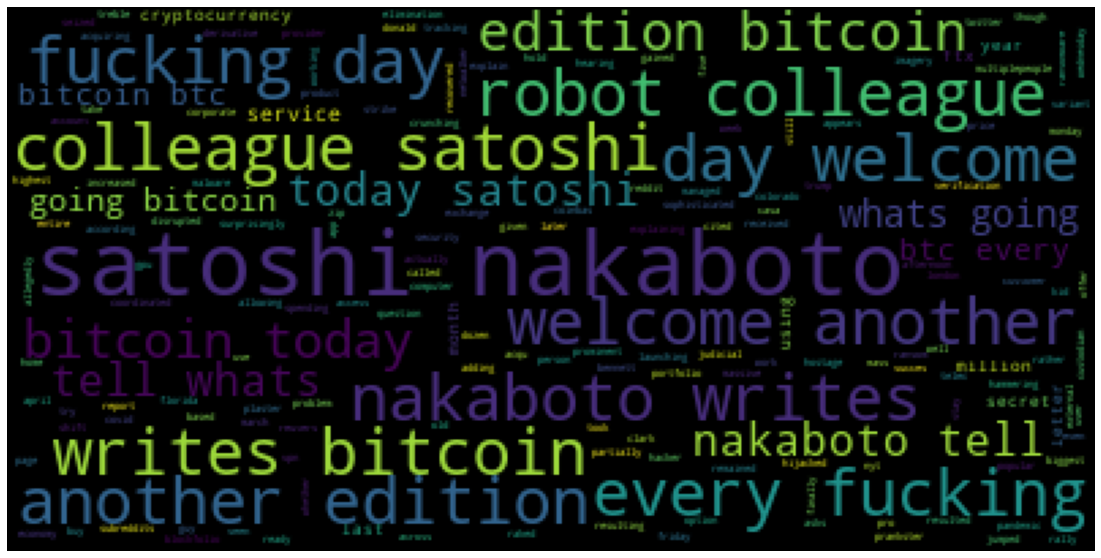

In [74]:
# Generate the Bitcoin word cloud
input_text = []

for index in bitcoin_df.index:
    input_text.append(" ".join(bitcoin_df['tokens'].loc[index]))

input_text = " ".join(input_text)

wc = WordCloud().generate(input_text)

plt.axis('off')
plt.imshow(wc)


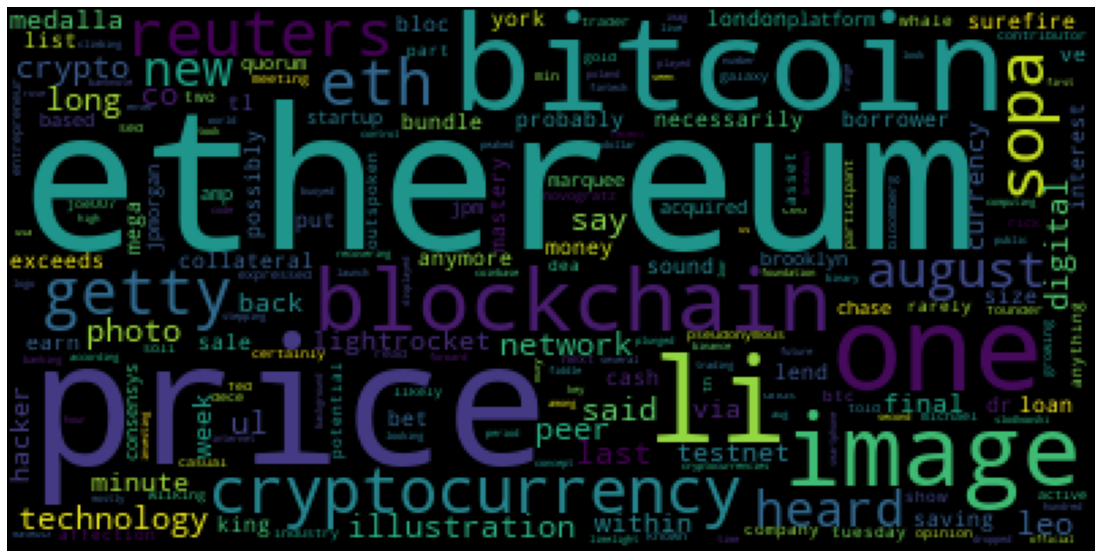

In [75]:
# Generate the Ethereum word cloud
input_text_eth = []

for index in ethereum_df.index:
    input_text_eth.append(" ".join(ethereum_df['tokens'].loc[index]))

input_text_eth = " ".join(input_text_eth)

wc_eth = WordCloud().generate(input_text_eth)
plt.axis('off')
plt.imshow(wc_eth)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [76]:
import spacy
from spacy import displacy

In [77]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [78]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [79]:
# Concatenate all of the bitcoin text together

bitcoin_all_text = ' '

for index in bitcoin_df.index:
    bitcoin_all_text = bitcoin_all_text + "\n" + bitcoin_df['content'].loc[index]

#print(bitcoin_all_text)

In [80]:
# Run the NER processor on all of the text

bitcoin_nlp_text = nlp(bitcoin_all_text)


# Add a title to the document

bitcoin_nlp_text.user_data['title'] = 'Bitcoin Named Entity Recognition'

In [81]:
# Render the visualization
displacy.render(bitcoin_nlp_text, style='ent', jupyter=True)

In [82]:
# List all Entities

list_entities_bitcoin =  [ent.text for ent in bitcoin_nlp_text.ents if ent.label_ in ['GPE', 'PERSON', 'ORG'] ]

#remove duplicated frm the list

print(list( dict.fromkeys(list_entities_bitcoin) ))

['Colorado', 'Coinbas', 'the Secret Service', 'Bitcoins', 'Clark', 'Bennett', 'Guy', 'NetWalker', 'Bitcoin', 'Reddit', 'pro-Donald Trump', 'LONDON', 'Reuters', 'Satoshi Nakaboto', 'Florida', 'Twitter', '+2786', 'Blockfolio', 'FTX']


---

## Ethereum NER

In [83]:
# Concatenate all of the bitcoin text together

ethereum_all_text = '' ''

for index in ethereum_df.index:
    ethereum_all_text = ethereum_all_text + "\n" + ethereum_df['content'].loc[index]

In [84]:
# Run the NER processor on all of the text

ethereum_nlp_text = nlp(ethereum_all_text)


# Add a title to the document

ethereum_nlp_text.user_data['title'] = 'Ethereum Named Entity Recognition'

In [85]:
# Render the visualization
displacy.render(ethereum_nlp_text, style='ent')

In [86]:
# List all Entities

list_entities_ethereum =  [ent.text for ent in ethereum_nlp_text.ents if ent.label_ in ['GPE', 'PERSON', 'ORG'] ]

#remove duplicated frm the list

print(list( dict.fromkeys(list_entities_ethereum) ))

['LONDON', 'Reuters', 'NEW YORK', 'Brooklyn', 'ConsenSys', 'JPMorgan Chase &amp', 'Bitcoin', 'BTC', 'UNUS SED LEO', 'LEO', 'Rick Wilking', 'ul><li', 'Michael Novogratz', 'Bloomberg', 'The Galaxy Digital', 'Fed', 'bitcoin', 'Ethereum', 'Mateusz Slodkowski/', 'Ethereum (ETH', 'Medalla', 'the Ethereum Foundation', 'Binance Futures', 'ETH', 'Fintech']
